Original Data:
    Feature1  Feature2
0       2.5       2.4
1       0.5       0.7
2       2.2       2.9
3       1.9       2.2
4       3.1       3.0
5       2.3       2.7
6       2.0       1.6
7       1.0       1.1
8       1.5       1.6
9       1.1       0.9

Covariance Matrix:
 [[1.11111111 1.0288103 ]
 [1.0288103  1.11111111]]

Eigenvalues:
 [2.13992141 0.08230081]

Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

PCA Transformed Data (Manual):
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]

Explained Variance Ratio (sklearn): [0.96296464 0.03703536]

PCA Transformed Data (sklearn):
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]

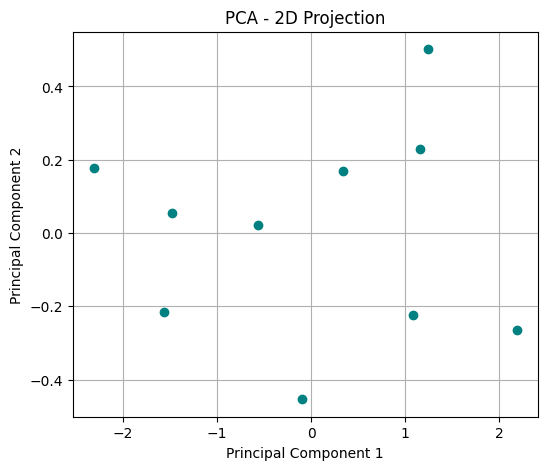

In [1]:
#QUESTION 6
# PCA Implementation Example

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
data = {
    'Feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'Feature2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(scaled_data.T)
print("\nCovariance Matrix:\n", cov_matrix)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 5: Sort eigenvalues and select principal components
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Step 6: Transform data to the new subspace
pca_result_manual = np.dot(scaled_data, sorted_eigenvectors)
print("\nPCA Transformed Data (Manual):\n", pca_result_manual)

# Step 7: PCA using sklearn for comparison
pca = PCA(n_components=2)
pca_result_sklearn = pca.fit_transform(scaled_data)

print("\nExplained Variance Ratio (sklearn):", pca.explained_variance_ratio_)
print("\nPCA Transformed Data (sklearn):\n", pca_result_sklearn)

# Step 8: Visualization
plt.figure(figsize=(6,5))
plt.scatter(pca_result_sklearn[:, 0], pca_result_sklearn[:, 1], color='teal')
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
